In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 200

## Leemos el dataset y configuramos los tipos de dato de cada columna

In [64]:
df = pd.read_csv('./src/AccidentesAvionesLimpio.csv')

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df[['Ubicación', 'Operador', 'Ruta', 'Tipo de aeronave', 'Resumen']] = df[['Ubicación', 'Operador', 'Ruta', 'Tipo de aeronave', 'Resumen']].astype('string')
df[['Total a bordo', 'Pasajeros a bordo', 'Tripulación a bordo','Total fallecidos', 'Fallecidos pasajeros ', 'Fallecidos tripulación','Fallecidos en tierra']]\
    = df[['Total a bordo', 'Pasajeros a bordo', 'Tripulación a bordo','Total fallecidos', 'Fallecidos pasajeros ', 'Fallecidos tripulación','Fallecidos en tierra']].astype('Int64')
    
    
df_pasajeros = pd.read_csv('./src/Pasajeros-por-año-1970-2021.csv')

Buscamos la cantidad de datos faltantes en cada columna

In [65]:
df.isna().sum()

Fecha                       0
Ubicación                   5
Operador                   10
Ruta                      763
Tipo de aeronave           13
Total a bordo              17
Pasajeros a bordo         221
Tripulación a bordo       219
Total fallecidos            8
Fallecidos pasajeros      235
Fallecidos tripulación    235
Fallecidos en tierra       44
Resumen                    59
dtype: int64

In [66]:
df.loc[df['Total fallecidos'].isna()]

,Fecha,Ubicación,Operador,Ruta,Tipo de aeronave,Total a bordo,Pasajeros a bordo,Tripulación a bordo,Total fallecidos,Fallecidos pasajeros,Fallecidos tripulación,Fallecidos en tierra,Resumen
103,1925-09-07,"Toul, France",CIDNA,<NA>,Spad 33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
347,1934-08-10,"Ningbo, China",China National Aviation Corporation,<NA>,Sikorsky S-38B,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
384,1935-08-13,"Hangow, China",China National Aviation Corporation,<NA>,Sikorsky S-38B,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Destoryed in a storm.
451,1936-12-26,"Nanking, China",China National Aviation Corporation,<NA>,Douglas DC-2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
652,1942-10-01,"Kunming, China",China National Aviation Corporation,<NA>,Douglas C-47,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Crashed while attempting to land after losing oil pressure on one engine.
754,1944-11-09,"Seljord, Norway",Military - U.S. Army Air Corps,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
854,1946-03-18,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Disappeared while en route. Plane never located.
1451,1954-03-13,"Dien Bien Phu, South Vietnam",Aigle Azur,<NA>,C-46,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Shot down.


Decidimos no eliminar los registros porque tienen algo de información que puede ser útil

### Comenzamos a analizar los accidentes por año

In [67]:
accidentes_por_año = df.groupby(df['Fecha'].dt.year).agg({'Fecha':'count', 'Total fallecidos': 'sum'}).rename(columns={'Fecha': 'Accidentes'}) .reset_index()
accidentes_por_año['Media de fallecidos'] = accidentes_por_año['Total fallecidos'] / accidentes_por_año['Accidentes']
accidentes_por_año

,Fecha,Accidentes,Total fallecidos,Media de fallecidos
0,1908,1,1,1.00
1,1909,1,1,1.00
2,1912,1,5,5.00
3,1913,3,43,14.33
4,1915,2,36,18.00
...,...,...,...,...
106,2017,15,214,14.27
107,2018,19,874,46.00
108,2019,13,305,23.46
109,2020,8,355,44.38


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


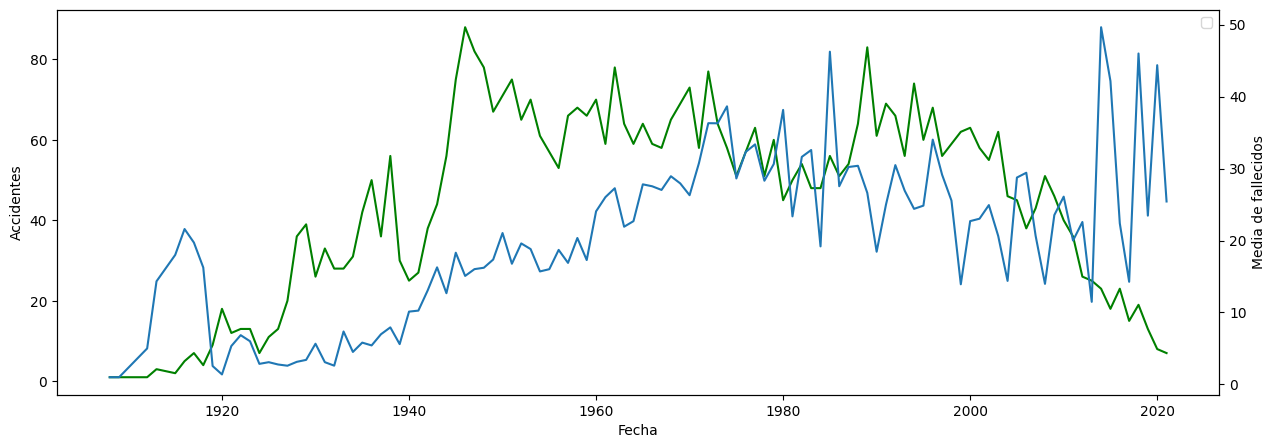

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=accidentes_por_año, x='Fecha', y='Accidentes', color='green', label='Accidentes')
plt.twinx()
sns.lineplot(data=accidentes_por_año, x='Fecha', y='Media de fallecidos', label='Media de fallecidos')

Se puede observar que la cantidad de accidentes aereos fue en aumento desde el comienzo de la aviación hasta estabilizarse relativamente desde aproximadamente los años 50 hasta los 90s, donde comienza un marcado declive de los mismos. 
Por otro lado, la media de accidentes por vuelo tendió a aumentar hasta al rededor de los años 80s, posiblemente debido al aumento en la capacidad de pasajeros de las aeronaves.

In [81]:
accidentes_por_año_1970_2021 = accidentes_por_año[accidentes_por_año['Fecha'] >= 1970]
accidentes_por_año_1970_2021['Total pasajeros'] = df_pasajeros['total'].values
accidentes_por_año_1970_2021['Accidentes cada millón de pasajeros'] = accidentes_por_año_1970_2021['Accidentes'] / (accidentes_por_año_1970_2021['Total pasajeros'] / 1000000)
accidentes_por_año_1970_2021['Fallecidos cada millón de pasajeros'] = accidentes_por_año_1970_2021['Total fallecidos'] / (accidentes_por_año_1970_2021['Total pasajeros'] / 1000000)

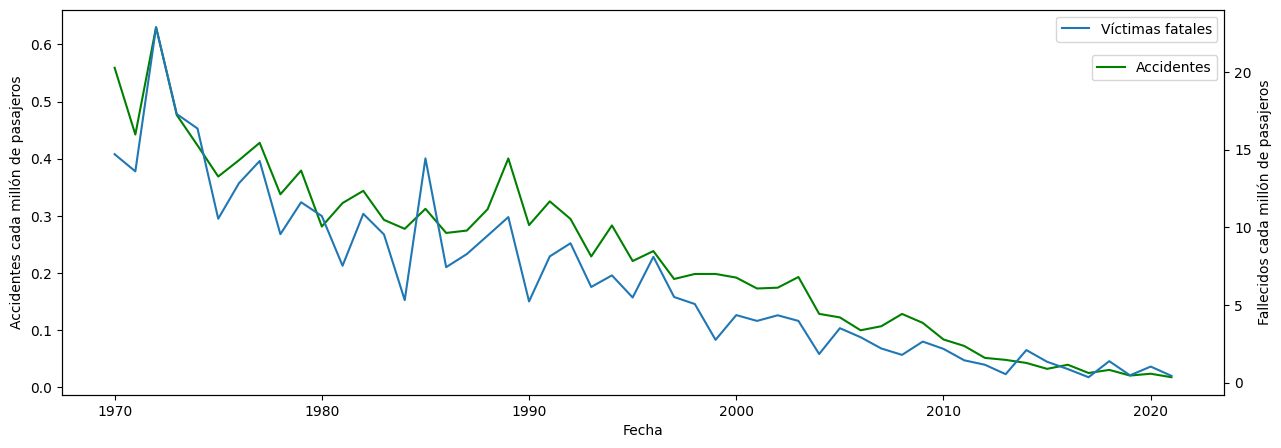

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=accidentes_por_año_1970_2021, x='Fecha', y='Accidentes cada millón de pasajeros', color='green', label='Accidentes')
plt.twinx()
sns.lineplot(data=accidentes_por_año_1970_2021, x='Fecha', y='Fallecidos cada millón de pasajeros', label='Víctimas fatales')
sns.move_legend(ax, "upper right", ncol=2, bbox_to_anchor=(1, 0.9))

Podemos ver con la información disponible desde el año 70, que la tasa de accidentes y de fallecidos por cantidad de pasajeros totales a nivel global ha ido disminuyendo de manera constante 

### Accidentes por tipo de aeronave

In [111]:
accidentes_por_aeronave = df.groupby(df['Tipo de aeronave']).agg({'Fecha':'count', 'Total fallecidos': 'sum'}).rename(columns={'Fecha': 'Accidentes'}).reset_index()
accidentes_por_aeronave['Media de fallecidos'] = accidentes_por_aeronave['Total fallecidos'] / accidentes_por_aeronave['Accidentes']
accidentes_por_aeronave.sort_values(by='Total fallecidos', ascending=False, inplace=True)
accidentes_por_aeronave.loc[accidentes_por_aeronave['Tipo de aeronave'].str.contains('737')].head(50)

,Tipo de aeronave,Accidentes,Total fallecidos,Media de fallecidos
534,Boeing B-737-222,4,350,87.50
549,Boeing B-737-2A8,5,297,59.40
528,Boeing B-737-200,5,254,50.80
414,Boeing 737-MAX 8,1,189,189.00
411,Boeing 737-8HG,2,179,89.50
413,Boeing 737-8KV WL,1,176,176.00
554,Boeing B-737-2H6,2,165,82.50
388,Boeing 737 Max 8,1,157,157.00
581,Boeing B-737-8EH /EMB-135JB,1,154,154.00
569,Boeing B-737-3Y0,2,149,74.50


La cantidad de versiones de cada modelo de aeronave en algunos casos es muy grande, lo que impide realizar el análisis al no contar con con la información técnica que permita agruparlos de manera adecuada.

### Operadores

In [113]:
accidentes_por_operador = df.groupby(df['Operador']).agg({'Fecha':'count', 'Total fallecidos': 'sum'}).rename(columns={'Fecha': 'Accidentes'}).reset_index()
accidentes_por_operador['Media de fallecidos'] = accidentes_por_operador['Total fallecidos'] / accidentes_por_operador['Accidentes']
accidentes_por_operador.sort_values(by='Total fallecidos', ascending=False, inplace=True)

<Axes: xlabel='Total fallecidos', ylabel='Operador'>

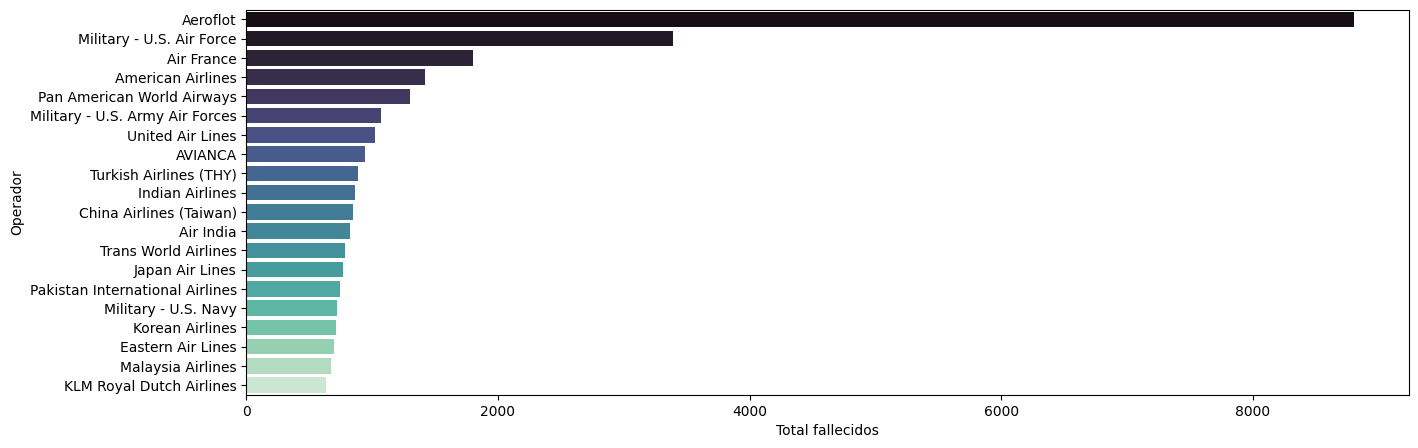

In [125]:
plt.figure(figsize=(15,5))
sns.barplot(data=accidentes_por_operador.head(20), x='Total fallecidos', y='Operador', palette='mako', orient='h')